In [1]:
!pip install imutils

  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25860 sha256=e1098e61b1b53dbb17920ee4052fd257788e6579842d3f72dbbd914f14400874
  Stored in directory: /home/datalore/.cache/pip/wheels/59/1b/52/0dea905f8278d5514dc4d0be5e251967f8681670cadd3dca89
Successfully built imutils
You should consider upgrading via the '/opt/python/envs/default/bin/python -m pip install --upgrade pip' command.


In [2]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from imutils import paths
import numpy as np
import cv2
import os

In [3]:
# from os.path import dirname, join,__file__
prototxtPath = 'deploy.prototxt.txt'
weightsPath= 'res10_300x300_ssd_iter_140000.caffemodel'

In [4]:
prototxtPath

'deploy.prototxt.txt'

In [5]:
net=cv2.dnn.readNet(weightsPath,prototxtPath)

In [6]:
net

<dnn_Net 0x7f599c17b6d0>

In [7]:
## Load model
model=load_model(r'custom_4370_32_100_v2.h5')

In [8]:
dataset = "test"
imagePaths=list(paths.list_images(dataset))
data=[]

for i in imagePaths:
    data.append(i)


In [9]:
image=cv2.imread("image (1).png")

In [10]:
image.shape

(300, 500, 3)

In [11]:
(h,w)=image.shape[:2]

In [12]:
blob=cv2.dnn.blobFromImage(image,1.0,(300,300),(104.0,177.0,123.0))
blob.shape
net.setInput(blob)
detections = net.forward()

In [13]:
detections

array([[[[0.        , 1.        , 0.9984212 , ..., 0.01878582,
          0.8179191 , 0.28129715],
         [0.        , 1.        , 0.9876604 , ..., 0.521464  ,
          0.30691096, 0.65869725],
         [0.        , 1.        , 0.9838157 , ..., 0.43405727,
          0.39659408, 0.55082923],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]]]], dtype=float32)

In [14]:
#loop over the detections
det =[]
a=0
for i in range(0,detections.shape[2]):
    confidence=detections[0,0,i,2]
    print("CONF: ",confidence)
    if confidence>0.3:
        box=detections[0,0,i,3:7]*np.array([w,h,w,h])
        (startX,startY,endX,endY)=box.astype('int')
        (startX,startY)=(max(0,startX),max(0,startY))
        (endX,endY)=(min(w-1,endX), min(h-1,endY))
        face=image[startY:endY, startX:endX]
        face=cv2.cvtColor(face,cv2.COLOR_BGR2RGB)
        plt.imshow(face)
        face=cv2.resize(face,(96,96))
        det.append(face)
        face=img_to_array(face)
        face=preprocess_input(face)
        face=np.expand_dims(face,axis=0)
        
        (withoutMask,mask)=model.predict(face)[0]
        print("MASK: ",mask)
        print("Without: ",withoutMask)
        #determine the class label and color we will use to draw the bounding box and text
        label='Mask' if mask>withoutMask else 'No Mask'
        color=(0,255,0) if label=='Mask' else (255,0,0)
        #include the probability in the label
        label="{}: {:.2f}%".format(label,max(mask,withoutMask)*100)
        
        #display the label and bounding boxes
        cv2.putText(image,label,(startX,startY-10),cv2.FONT_HERSHEY_SIMPLEX,0.45,color,2)
        cv2.rectangle(image,(startX,startY),(endX,endY),color,2)   
        a=a+1
# plt.imshow(det[1])
    

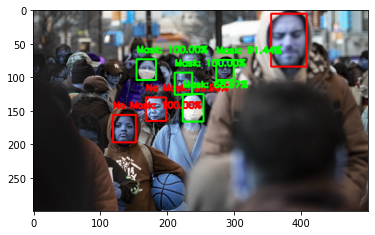

In [15]:
plt.imshow(image)